In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
data = pd.read_csv("C:\\Users\\Amartya\\Desktop\\forestfires.csv") 
print(data.head())
print(data.columns)
data['day'].value_counts()

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [13]:
print(data.corr())
#every variable present here don't have correlation even greater than |0.1|
# cannot be linear regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
V=data[['X', 'Y',  'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']]
vif_data=pd.DataFrame()
vif_data['feature']=V.columns
#calculation of VIF for each feature
vif_data['VIF']=[variance_inflation_factor(V.values,i) for i in range (len(V.columns))]
vif_data

             X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X     0.085223  

,feature,VIF
0,X,7.271797
1,Y,18.604221
2,FFMC,64.066899
3,DMC,8.575928
4,DC,12.518196
5,ISI,6.475387
6,temp,28.405878
7,RH,12.104669
8,wind,6.637032
9,rain,1.040657


In [8]:
print(data['area'].value_counts())
#

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64


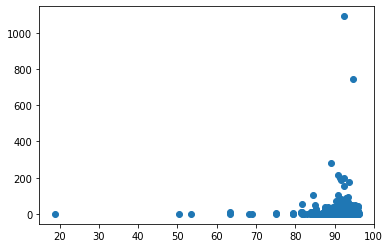

In [15]:
plt.scatter(data['FFMC'],data['area'])
plt.show()

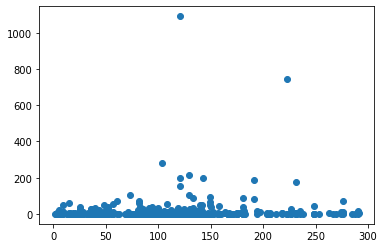

In [6]:
plt.scatter(data['DMC'],data['area'])
plt.show()

[]

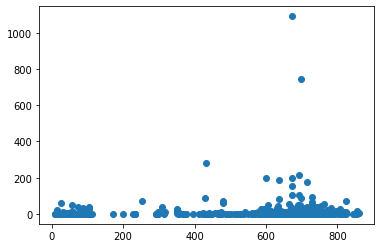

In [17]:
plt.scatter(data['DC'],data['area'])
plt.plot()

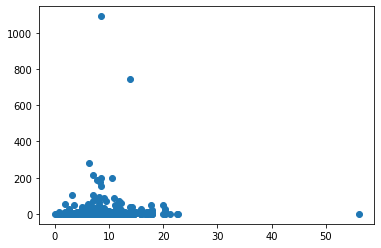

In [2]:


plt.scatter(data['ISI'],data['area'])
plt.show()

In [33]:
print(data.iloc[:,1].values)

[5 4 4 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3
 4 3 4 4 4 4 4 4 6 6 6 4 4 4 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 5 5 5 4 4
 4 9 9 3 2 2 2 2 2 2 2 2 2 2 2 5 5 6 6 6 6 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 4
 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 6 6 6 6 5 5 6 6 9 4 5 2 6 2 5 5 4 3
 2 6 5 9 4 4 5 4 4 2 4 4 4 4 3 6 5 5 5 5 5 6 4 6 4 4 4 4 5 5 5 6 3 6 4 4 6
 5 6 5 4 4 5 5 2 5 2 5 5 5 4 4 5 5 4 6 6 5 2 5 5 3 4 4 4 3 4 4 4 3 5 5 6 4
 3 2 4 4 5 6 6 6 4 5 4 4 5 6 2 2 5 5 3 4 4 4 4 4 4 4 6 4 5 5 5 4 3 5 6 3 4
 4 4 4 4 3 4 4 5 2 4 4 2 6 5 6 6 6 4 4 4 4 6 5 3 4 4 5 6 4 4 4 5 4 5 6 6 5
 4 6 6 5 5 5 6 6 5 4 4 4 4 4 4 3 4 5 4 4 5 4 5 4 3 4 5 5 5 4 4 5 5 3 3 4 4
 4 3 3 4 3 6 4 5 6 3 6 3 2 4 4 4 4 4 4 4 4 4 4 4 3 3 4 5 3 4 3 5 5 5 5 5 5
 4 4 5 4 5 5 6 2 5 5 4 6 6 6 4 4 4 5 4 4 4 6 3 4 5 5 3 6 2 5 5 4 9 6 4 2 5
 5 3 4 3 4 4 5 4 6 3 5 4 5 8 4 6 3 6 2 6 4 3 4 4 3 6 4 4 5 6 6 5 3 4 6 5 2
 5 5 5 4 4 4 5 4 4 5 4 4 4 4 6 4 5 6 4 5 4 2 5 4 5 3 4 3 3 4 3 5 3 3 4 4 9
 3 4 6 5 4 4 4 4 4 4 4 3 

In [16]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
x=data[['X', 'Y', 'month', 'day', 'FFMC','DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']]
y=data[['area']]
le_month = preprocessing.LabelEncoder()
le_month1=le_month.fit([ 'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
x.iloc[:,2]= le_month1.transform(x.iloc[:,2])
print(x.iloc[:,2])

le_day = preprocessing.LabelEncoder()
le_day1=le_day.fit([ 'sun','mon','tue','wed','thu','fri','sat'])
x.iloc[:,3]= le_day1.transform(x.iloc[:,3])
print(x.iloc[:,3])
print(x)

0       7
1      10
2      10
3       7
4       7
       ..
512     1
513     1
514     1
515     1
516     9
Name: month, Length: 517, dtype: int32
0      0
1      5
2      2
3      0
4      3
      ..
512    3
513    3
514    3
515    2
516    5
Name: day, Length: 517, dtype: int32
     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5      7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4     10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4     10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6      7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6      7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4      

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=4)
tree=DecisionTreeRegressor(criterion='mse',max_depth=6)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
y_pred[0:10]
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r_square:',r2_score(y_test,y_pred))


RMSE: 69.0466677270258
r_square: -0.2719661214227065


In [22]:
# Here we can see that RMSE is too high  as well as r-square is two small which implies that goodness of fit is not too good.
#So, we first exclude our outlier to increase the goodness of fit.
exclude_outlier_data=data[(data['area']>200) ]
exclude_outlier_data


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [23]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
new_data=data[(data['area']<300)]
x_new=new_data[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain']]
y_new=new_data[['area']]
print(x_new)
print(y_new)

     X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0

[515 rows x 10 columns]
      area
0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
..     ...
512   6.44
513  54.29
514  11.16
515   0.00
516   0.00

[515 rows x 1 columns]


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x_new_train,x_new_test,y_ne_train,y_new_test=train_test_split(x_new,y_new,test_size=.3,random_state=42)
regressor=RandomForestRegressor(n_estimators=50,criterion='mse',max_depth=4)
regressor.fit(x_new_train,y_new_train)
y_new_pred=regressor.predict(x_new_test)
print(y_new_pred)
print(y_new_test)
print('RMSE:',np.sqrt(mean_squared_error(y_new_test,y_new_pred)))
print('r2:{}'.format(regressor.score(x_new_train,y_new_train)))


[ 4.98116698  8.86619074  7.49911634  5.69195517 12.1861121   4.65809878
  5.48942826  5.8098154   5.48096999  9.81742156  4.52718143  9.00760273
  9.14076074  6.69744667 11.91333483  5.59602503  6.32438964  6.16481335
 13.5594493   7.33715269  5.50663842 14.01236896  7.22737638  5.03034944
  5.40140149  9.81963518 22.99053993 19.00797417  9.75423631  6.80075335
 11.70185122 12.78342473 15.35668418 22.76191945  8.00541137  5.66899294
  8.45375527  8.24893149 12.87157169  4.98943693  4.45604563  9.76524743
  7.19841303 12.78790013  9.14186696  5.96916777  7.00972378  5.85050095
 14.27880646 13.01602985  7.10118943 11.95640252  9.85391807  2.76182671
  8.45478127  4.97428746  6.08654927 11.67263128  9.3137771   8.99239132
 15.05235    12.81184347 20.73406985 18.67297035  7.55784333 10.83726493
  5.33701543 21.06940752  8.09256663 11.53399839 11.48872652 10.57311647
 12.66637284  6.80753795  7.81377738 12.69710867 29.92902338  8.51891082
  7.72941088 16.10930951  7.57942872  9.03084623 10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [25]:
from pprint import pprint
pprint(regressor.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [59]:
#Random hyperparameter Grid
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=500, stop=4000,num=20)]
#number of features to consider at every split
max_features=6
#max no of levels in a tree
max_depth=[int(x) for x in np.linspace(2,10,num=4)]
max_depth.append(None)
#minimum number of samples required to split a node
min_samples_split=[2,10,5]
# minimum number of samples required at each  leaf node
min_samples_leaf=[1,2,4,6,10]
#Method of selecting samples for selecting each tree
bootstrap=[True,False]
#create the random grid
random_grid={"n_estimators":n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 7, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 10],
 'min_samples_split': [2, 10, 5],
 'n_estimators': [500,
                  684,
                  868,
                  1052,
                  1236,
                  1421,
                  1605,
                  1789,
                  1973,
                  2157,
                  2342,
                  2526,
                  2710,
                  2894,
                  3078,
                  3263,
                  3447,
                  3631,
                  3815,
                  4000]}


In [60]:
# use the random grid to search for best hyperparameters
# First we create the base model to tune 

rf=RandomForestRegressor()
# Random search of parameters using 3 fold cross validation 
#search across 100 different combinations and use all available cores
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=10,verbose=5)
# Fit the random search model
rf_random.fit(x_new_train,y_new_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.034, total=   4.6s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.198, total=   4.6s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.046, total=   4.4s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.5s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-1.821, total=   4.5s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.298, total=   3.9s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.932, total=   3.8s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.353, total=   4.2s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.022, total=   3.9s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.465, total=   3.9s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.185, total=   3.7s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.009, total=   3.8s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.026, total=   3.6s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=0.014, total=   3.5s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.284, total=   3.5s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.035, total=   3.8s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.252, total=   3.7s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=0.045, total=   3.5s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.024, total=   3.9s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.078, total=   3.6s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.034, total=   5.0s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.029, total=   5.9s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.090, total=   8.9s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=0.005, total=   7.9s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.896, total=   5.1s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.146, total=   5.8s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.581, total=   4.5s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.033, total=   4.4s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.012, total=   4.7s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.311, total=   4.4s
[CV] n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.095, total=   4.3s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.014, total=   1.2s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.000, total=   1.3s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.227, total=   1.4s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   1.6s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.011, total=   1.2s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.368, total=   1.2s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.488, total=   1.2s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   1.2s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   1.3s
[CV] n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.054, total=   1.2s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.026, total=   4.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.138, total=   4.5s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.015, total=   4.0s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-1.314, total=   4.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.174, total=   4.2s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.716, total=   4.3s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.128, total=   4.5s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=0.007, total=   4.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.405, total=   4.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.164, total=   4.4s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.015, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.122, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.023, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.916, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.189, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.626, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.284, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.011, total=   2.0s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.297, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=True, score=-0.134, total=   1.7s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.011, total=   3.4s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.022, total=   3.5s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=0.012, total=   4.2s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.280, total=   3.6s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.033, total=   3.2s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.357, total=   3.5s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.114, total=   3.5s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.029, total=   4.8s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.041, total=   3.6s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.041, total=   3.4s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.042, total=   2.3s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.088, total=   3.0s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=0.015, total=   2.7s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.922, total=   2.5s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.150, total=   2.5s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.633, total=   3.8s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=0.018, total=   2.3s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.049, total=   2.7s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.313, total=   2.6s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.090, total=   2.3s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.017, total=   1.4s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.026, total=   1.4s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=0.013, total=   1.5s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.328, total=   1.3s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.031, total=   1.4s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.233, total=   1.4s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=0.022, total=   1.4s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.017, total=   1.4s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.075, total=   1.5s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.028, total=   1.5s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.002, total=   3.3s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.065, total=   3.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=0.012, total=   3.3s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.740, total=   3.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.106, total=   3.6s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.462, total=   3.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=0.029, total=   3.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.007, total=   3.3s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.205, total=   3.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.090, total=   3.5s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.012, total=   1.8s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.151, total=   1.8s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.083, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.807, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.243, total=   1.7s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.638, total=   1.8s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.620, total=   1.8s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.043, total=   2.0s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.233, total=   1.8s
[CV] n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.167, total=   1.9s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.043, total=   4.4s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.110, total=   4.3s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.013, total=   4.6s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-1.396, total=   4.3s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.223, total=   4.4s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.803, total=   4.5s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=0.007, total=   4.5s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.038, total=   4.3s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.504, total=   4.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.139, total=   4.7s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.025, total=   5.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.139, total=   4.9s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.017, total=   5.4s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-1.426, total=   5.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.186, total=   4.9s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.769, total=   5.3s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.120, total=   5.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.003, total=   4.9s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.443, total=   4.9s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.165, total=   5.2s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.026, total=   2.6s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.272, total=   2.6s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.046, total=   2.6s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-2.011, total=   2.7s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.221, total=   2.8s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-1.176, total=   2.6s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.321, total=   2.6s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=0.008, total=   2.6s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.460, total=   2.6s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.205, total=   2.7s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.014, total=   6.6s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.034, total=   6.3s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=0.008, total=   6.2s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.291, total=   5.9s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.062, total=   5.9s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.312, total=   6.2s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.258, total=   5.9s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.038, total=   5.8s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.102, total=   6.1s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.068, total=   6.0s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.016, total=   1.3s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.043, total=   1.3s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.025, total=   1.3s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.279, total=   1.6s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.075, total=   1.2s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.394, total=   1.3s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.398, total=   1.5s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.103, total=   1.4s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.087, total=   1.3s
[CV] n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=True, score=-0.061, total=   1.3s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.021, total=   3.0s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.154, total=   3.0s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.030, total=   3.3s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-1.445, total=   3.1s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.217, total=   3.0s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.701, total=   3.0s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.261, total=   3.0s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.006, total=   3.2s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.373, total=   3.0s
[CV] n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.186, total=   3.0s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=0.077, total=   2.6s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.254, total=   2.5s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.020, total=   2.5s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   2.8s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.266, total=   2.5s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.360, total=   2.5s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.035, total=   2.5s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   2.6s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.052, total=   2.5s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.054, total=   2.8s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.028, total=   4.7s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.090, total=   4.7s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=0.005, total=   4.7s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.892, total=   5.1s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.143, total=   6.2s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.588, total=   6.5s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.028, total=   4.6s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.013, total=   4.7s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.305, total=   4.7s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.096, total=   4.9s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.018, total=   2.3s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.064, total=   2.4s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=0.012, total=   2.4s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.797, total=   2.3s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.100, total=   2.5s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.525, total=   2.4s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=0.005, total=   2.4s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.021, total=   2.3s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.195, total=   2.3s
[CV] n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.084, total=   2.3s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.016, total=   4.5s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.230, total=   5.0s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.065, total=   5.1s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-1.400, total=   4.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.245, total=   4.5s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.917, total=   4.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.279, total=   4.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.010, total=   4.4s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.331, total=   4.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.199, total=   4.2s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.074, total=   6.5s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.262, total=   6.2s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.151, total=   5.7s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-1.823, total=   6.3s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.477, total=   6.4s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-1.512, total=   5.9s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.391, total=   6.1s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.130, total=   6.1s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.485, total=   7.5s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=False, score=-0.250, total=   6.3s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.045, total=   6.8s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.075, total=   7.0s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=0.026, total=   6.4s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.728, total=   7.5s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.114, total=   6.0s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.538, total=   6.2s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.009, total=   6.3s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.044, total=   6.1s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.278, total=   6.6s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.090, total=   5.9s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-0.050, total=   2.9s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-0.100, total=   3.0s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=0.000, total=   3.2s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-1.111, total=   3.0s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-0.179, total=   2.9s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-0.723, total=   3.0s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=0.016, total=   2.9s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-0.043, total=   3.0s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-0.421, total=   2.9s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=True, score=-0.115, total=   2.8s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.018, total=   3.4s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.080, total=   3.6s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=0.005, total=   4.0s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.651, total=   3.4s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.101, total=   3.4s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.477, total=   3.5s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.077, total=   3.3s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.016, total=   3.7s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.172, total=   4.4s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.102, total=   4.0s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.062, total=   5.9s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.774, total=   6.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.226, total=   5.3s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-4.849, total=   6.0s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.717, total=   6.4s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-2.731, total=   5.2s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.404, total=   5.3s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.154, total=   5.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.660, total=   5.0s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.422, total=   5.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-0.487, total=   6.3s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.773, total=   6.5s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.296, total=   8.3s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-18.550, total=   7.7s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.016, total=   8.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-6.357, total=   7.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-1.915, total=   8.0s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-0.951, total=   7.4s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.288, total=   7.5s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-0.241, total=   7.3s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.011, total=   4.8s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.021, total=   4.5s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=0.011, total=   4.6s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.277, total=   4.7s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.031, total=   5.4s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.344, total=   5.1s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.109, total=   4.4s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.044, total=   4.9s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.041, total=   4.4s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.034, total=   4.4s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.007, total=   1.8s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.066, total=   2.0s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=0.012, total=   2.4s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.727, total=   1.9s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.104, total=   2.1s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.441, total=   2.5s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=0.034, total=   1.9s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.004, total=   2.6s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.199, total=   2.3s
[CV] n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=False, score=-0.088, total=   2.6s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.031, total=   3.2s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.202, total=   3.6s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.039, total=   3.1s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-1.775, total=   3.3s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.319, total=   3.5s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.928, total=   3.0s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.349, total=   3.0s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.028, total=   3.4s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.488, total=   4.3s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.195, total=   4.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.014, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.000, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.227, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.011, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.368, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.488, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.141, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=0.000, total=   0.7s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.062, total=   3.3s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.774, total=   3.5s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.226, total=   3.1s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-4.849, total=   2.9s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.690, total=   3.0s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-2.731, total=   3.2s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.404, total=   3.3s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.154, total=   3.1s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.660, total=   3.3s
[CV] n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.422, total=   3.3s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.029, total=   5.7s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.182, total=   5.6s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.025, total=   5.5s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-1.937, total=   5.9s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.240, total=   4.8s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.828, total=   4.3s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.286, total=   4.8s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.021, total=   4.7s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.442, total=   4.7s
[CV] n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.202, total=   4.6s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.027, total=   0.9s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.096, total=   1.0s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=0.004, total=   0.9s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.880, total=   1.0s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.154, total=   0.9s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.605, total=   0.9s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.019, total=   0.9s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.018, total=   1.0s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.283, total=   1.1s
[CV] n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.094, total=   1.0s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.025, total=   7.3s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.051, total=   7.8s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=0.026, total=   7.5s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.512, total=   8.6s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.075, total=   7.6s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.444, total=   5.8s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.001, total=   5.5s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.031, total=   5.3s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.182, total=   5.3s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.067, total=   5.4s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 
[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.043, total=   6.0s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.111, total=   5.8s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.011, total=   5.8s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-1.403, total=   6.0s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.212, total=   5.7s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.793, total=   5.7s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.007, total=   6.0s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.030, total=   5.8s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.493, total=   5.9s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.137, total=   6.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.029, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.080, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=0.018, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.922, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.126, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.600, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=0.013, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.032, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.294, total=   0.7s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.110, total=   0.8s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-0.050, total=   3.6s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-2.508, total=   3.2s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-2.331, total=   3.6s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-0.407, total=   3.6s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-0.172, total=   3.6s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-0.406, total=   3.7s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-1.836, total=   3.4s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-0.625, total=   4.1s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=-0.286, total=   3.7s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=False, score=0.011, total=   3.8s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.014, total=   2.5s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.000, total=   2.5s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.227, total=   2.5s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   2.6s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.011, total=   2.8s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.368, total=   3.0s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.488, total=   2.7s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   2.6s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   2.9s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=False, score=-0.054, total=   2.7s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.030, total=   5.5s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.091, total=   4.9s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=0.005, total=   5.0s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.898, total=   5.6s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.143, total=   5.2s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.589, total=   4.9s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.026, total=   5.3s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.015, total=   5.1s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.308, total=   4.8s
[CV] n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.097, total=   4.8s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.044, total=   4.6s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.326, total=   4.4s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.113, total=   4.5s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-2.376, total=   4.9s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.344, total=   4.8s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-1.111, total=   4.2s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.363, total=   4.2s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.023, total=   4.3s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.539, total=   4.2s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.245, total=   4.4s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.042, total=   6.6s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.119, total=   6.5s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.015, total=   6.4s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-1.418, total=   6.4s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.219, total=   5.8s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.778, total=   6.1s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.023, total=   5.7s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.033, total=   5.9s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.476, total=   6.6s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=True, score=-0.136, total=   6.3s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.041, total=   3.5s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.074, total=   3.7s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=0.032, total=   3.5s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.660, total=   3.4s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.106, total=   3.6s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.557, total=   3.5s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.005, total=   3.9s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.046, total=   3.7s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.236, total=   3.6s
[CV] n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.075, total=   3.5s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.024, total=   5.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.263, total=   5.1s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.085, total=   4.9s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-1.723, total=   5.6s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.294, total=   5.0s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-1.017, total=   4.8s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.342, total=   5.4s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.022, total=   4.9s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.422, total=   5.0s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.231, total=   5.3s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.013, total=   2.9s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.032, total=   2.7s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=0.005, total=   2.6s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.268, total=   2.7s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.067, total=   2.9s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.338, total=   3.1s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.276, total=   2.6s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.036, total=   2.7s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.106, total=   2.9s
[CV] n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.068, total=   2.9s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.049, total=   7.2s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.783, total=   7.2s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.240, total=   7.2s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-4.902, total=   7.1s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.649, total=   7.1s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-2.685, total=   7.8s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.403, total=   7.6s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.150, total=   7.4s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.526, total=   7.1s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=7, bootstrap=False, score=-0.386, total=   7.4s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.014, total=   3.6s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-1.748, total=   3.8s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-2.067, total=   4.1s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   3.6s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.011, total=   3.6s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.363, total=   3.8s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.488, total=   4.1s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   3.9s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.055, total=   3.9s
[CV] n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.054, total=   3.9s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.031, total=   1.4s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.086, total=   1.5s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=0.009, total=   1.8s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.891, total=   1.9s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.138, total=   1.6s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.599, total=   1.6s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.024, total=   1.7s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.014, total=   1.5s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.287, total=   1.4s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.099, total=   1.6s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=0.040, total=   8.1s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.631, total=   7.4s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.189, total=   7.7s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-5.755, total=   7.6s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-1.180, total=   9.0s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-3.632, total=   8.9s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.891, total=   7.5s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.139, total=   6.9s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.524, total=   7.0s
[CV] n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.401, total=   6.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.015, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.036, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=0.014, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.300, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.054, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.342, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.242, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.025, total=   0.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.109, total=   1.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, bootstrap=True, score=-0.082, total=   0.8s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.043, total=   2.5s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.077, total=   2.3s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=0.026, total=   2.2s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.681, total=   2.2s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.105, total=   2.2s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.578, total=   2.1s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=0.008, total=   2.5s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.037, total=   2.2s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.228, total=   2.2s
[CV] n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=4, bootstrap=True, score=-0.074, total=   2.2s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.021, total=   6.2s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.193, total=   6.5s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.046, total=   6.5s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-1.936, total=   6.5s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.234, total=   6.3s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.812, total=   6.3s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.248, total=   6.5s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.027, total=   6.3s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.465, total=   6.6s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, score=-0.217, total=   6.2s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.025, total=   3.7s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.049, total=   3.8s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=0.028, total=   3.9s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.525, total=   3.7s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.075, total=   3.7s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.442, total=   3.7s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=0.000, total=   4.2s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.028, total=   3.7s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.175, total=   3.7s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.065, total=   3.7s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.028, total=   3.8s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.060, total=   3.6s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=0.021, total=   3.6s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.739, total=   3.6s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.121, total=   3.9s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.547, total=   3.5s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.004, total=   3.6s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.024, total=   3.6s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.272, total=   3.5s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.090, total=   4.0s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.017, total=   4.3s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.163, total=   4.2s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.075, total=   4.6s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.795, total=   6.1s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.256, total=   6.3s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.573, total=   6.2s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.498, total=   5.4s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.075, total=   5.1s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.204, total=   5.4s
[CV] n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=4, bootstrap=True, score=-0.118, total=   5.2s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.024, total=   4.9s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.044, total=   5.5s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=0.028, total=   4.9s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.467, total=   5.3s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.064, total=   5.1s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.418, total=   4.7s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=0.002, total=   4.9s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.034, total=   6.1s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.146, total=   5.6s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.053, total=   5.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.013, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.061, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=0.010, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.674, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.118, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.497, total=   0.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.064, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=0.006, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.206, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.103, total=   0.8s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=0.077, total=   3.4s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.254, total=   3.7s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.020, total=   3.6s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   3.7s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.266, total=   3.5s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.360, total=   3.6s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.035, total=   3.6s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.058, total=   3.8s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.052, total=   3.6s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=2, bootstrap=False, score=-0.054, total=   4.0s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.042, total=   2.1s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.086, total=   2.1s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=0.019, total=   2.5s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.893, total=   2.3s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.160, total=   2.1s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.675, total=   2.1s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=0.027, total=   2.1s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.051, total=   2.2s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.293, total=   2.8s
[CV] n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=4, bootstrap=True, score=-0.087, total=   2.3s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.029, total=   2.1s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.090, total=   1.5s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.000, total=   1.6s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.901, total=   1.8s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.145, total=   1.8s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.608, total=   1.4s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.032, total=   1.4s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.019, total=   1.4s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.301, total=   1.5s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.095, total=   1.5s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.025, total=   6.1s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.143, total=   6.9s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.020, total=   6.0s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-1.388, total=   6.2s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.176, total=   6.0s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.725, total=   7.5s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.116, total=   6.6s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=0.002, total=   7.0s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.428, total=   7.0s
[CV] n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.165, total=   7.1s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.026, total=   3.3s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.117, total=   3.3s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.003, total=   3.1s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-1.143, total=   3.2s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.169, total=   3.8s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.738, total=   3.2s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.025, total=   3.2s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.011, total=   3.1s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.364, total=   3.6s
[CV] n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.125, total=   3.4s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.062, total=   7.9s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.774, total=   8.4s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.225, total=   7.6s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-4.849, total=   8.1s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.690, total=   8.1s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-2.731, total=   8.3s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.404, total=   7.4s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.154, total=   8.3s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.660, total=   7.7s
[CV] n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=4000, min_samples_split=10, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=False, score=-0.422, total=   7.8s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=0.040, total=   2.3s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.631, total=   2.3s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.189, total=   2.3s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-5.755, total=   2.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-1.180, total=   2.4s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-3.632, total=   2.5s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.891, total=   2.6s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.139, total=   2.4s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.516, total=   2.3s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=7, bootstrap=False, score=-0.401, total=   2.3s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.016, total=   4.1s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.226, total=   4.6s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.058, total=   4.5s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-1.449, total=   4.1s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.241, total=   4.1s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.891, total=   5.0s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.275, total=   4.2s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.016, total=   4.0s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.321, total=   4.1s
[CV] n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.193, total=   4.0s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.038, total=   3.1s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.338, total=   3.1s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.085, total=   3.1s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-2.357, total=   3.3s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.335, total=   3.1s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-1.095, total=   3.2s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.351, total=   3.3s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.018, total=   3.2s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.545, total=   3.3s
[CV] n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.243, total=   3.1s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.022, total=   1.9s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.023, total=   2.0s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=0.019, total=   2.0s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.255, total=   1.9s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.033, total=   1.9s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.284, total=   2.3s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=0.033, total=   2.1s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.025, total=   2.0s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.088, total=   1.9s
[CV] n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1421, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.029, total=   2.0s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.047, total=   1.5s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.084, total=   1.5s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=0.027, total=   1.5s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.721, total=   1.5s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.109, total=   1.6s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.597, total=   1.6s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.023, total=   1.5s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.043, total=   1.5s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.275, total=   1.5s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=10, bootstrap=True, score=-0.090, total=   1.5s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.058, total=   5.3s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.354, total=   5.5s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.120, total=   5.2s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-2.985, total=   5.3s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.346, total=   6.6s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-1.217, total=   6.2s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.394, total=   6.9s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.080, total=   8.1s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.695, total=   5.8s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.240, total=   8.5s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.046, total=   9.7s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.266, total=   8.2s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.116, total=   7.7s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-2.285, total=   7.8s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.486, total=   7.6s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-1.048, total=   7.8s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.651, total=   7.6s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.098, total=   7.9s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.572, total=   7.5s
[CV] n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.245, total=   8.8s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.014, total=   3.5s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-1.748, total=   3.4s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-2.067, total=   3.5s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   3.0s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.011, total=   2.9s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.363, total=   3.0s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.530, total=   2.8s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.642, total=   3.8s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=-0.055, total=   3.1s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=2, bootstrap=False, score=0.000, total=   3.6s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.043, total=   9.1s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.245, total=   7.7s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.098, total=   7.9s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-2.019, total=   7.7s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.456, total=   8.5s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-1.045, total=   7.6s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.746, total=   7.9s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.070, total=   7.8s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.502, total=   7.9s
[CV] n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, score=-0.257, total=   7.7s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.076, total=   4.5s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.858, total=   4.8s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.489, total=   4.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-3.250, total=   4.5s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.176, total=   4.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.967, total=   5.0s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-1.802, total=   4.5s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.055, total=   6.1s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.287, total=   4.5s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, bootstrap=False, score=-0.043, total=   4.3s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.025, total=   4.1s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.056, total=   4.1s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=0.013, total=   4.4s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.611, total=   4.1s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.086, total=   4.1s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.519, total=   4.1s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=0.018, total=   4.3s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.014, total=   4.5s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.215, total=   4.2s
[CV] n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.074, total=   4.4s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.043, total=   7.0s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.237, total=   6.8s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.111, total=   7.2s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-2.060, total=   6.9s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.471, total=   7.2s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-1.081, total=   6.9s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.715, total=   7.2s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.077, total=   7.0s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.527, total=   7.4s
[CV] n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.279, total=   7.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.030, total=   4.1s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.298, total=   4.2s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.041, total=   4.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-2.056, total=   4.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.228, total=   3.9s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-1.099, total=   4.2s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.340, total=   4.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.003, total=   4.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.537, total=   4.0s
[CV] n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3078, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.188, total=   4.6s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.027, total=   1.0s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.121, total=   1.0s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.014, total=   1.0s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-1.160, total=   1.1s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.194, total=   1.0s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.796, total=   1.0s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.035, total=   1.1s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.014, total=   1.0s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.404, total=   1.0s
[CV] n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=10, min_samples_leaf=6, max_features=sqrt, max_depth=None, bootstrap=False, score=-0.125, total=   1.0s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-0.052, total=   4.1s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-0.101, total=   4.3s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=0.005, total=   4.0s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-1.075, total=   4.2s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-0.173, total=   4.3s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-0.681, total=   4.3s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=0.012, total=   5.0s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-0.047, total=   4.2s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-0.400, total=   4.4s
[CV] n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=10, bootstrap=True, score=-0.116, total=   4.1s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.030, total=   4.1s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.063, total=   4.1s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=0.019, total=   4.3s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.745, total=   4.1s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.106, total=   4.1s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.520, total=   4.1s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=0.005, total=   4.3s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.022, total=   4.0s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.249, total=   4.1s
[CV] n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2894, min_samples_split=2, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.086, total=   4.1s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.009, total=   1.4s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.027, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=0.012, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.290, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.034, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.248, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=0.050, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.023, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.076, total=   1.2s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.034, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.018, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.025, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=0.015, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.340, total=   1.5s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.027, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.263, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=0.008, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.019, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.084, total=   1.2s
[CV] n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=2, bootstrap=False, score=-0.029, total=   1.4s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.011, total=   2.6s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.137, total=   2.2s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.005, total=   2.1s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-1.276, total=   2.4s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.202, total=   2.1s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.763, total=   2.1s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.029, total=   2.1s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=0.020, total=   2.1s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.421, total=   2.1s
[CV] n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1789, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.143, total=   2.1s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.033, total=   4.2s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.175, total=   3.9s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.041, total=   4.0s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-1.842, total=   3.9s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.299, total=   4.2s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.914, total=   3.9s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.345, total=   3.9s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.021, total=   3.9s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.479, total=   4.3s
[CV] n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2157, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=7, bootstrap=True, score=-0.189, total=   3.9s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.023, total=   2.2s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.040, total=   2.1s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=0.027, total=   2.2s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.476, total=   2.1s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.064, total=   2.6s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.414, total=   2.2s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.005, total=   2.2s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.030, total=   2.1s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.134, total=   2.2s
[CV] n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1605, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.053, total=   2.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.026, total=   3.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.118, total=   3.3s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.003, total=   3.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-1.136, total=   3.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.172, total=   3.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.759, total=   3.1s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.031, total=   3.3s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.007, total=   3.2s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.364, total=   3.3s
[CV] n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2710, min_samples_split=5, min_samples_leaf=6, max_features=sqrt, max_depth=7, bootstrap=False, score=-0.123, total=   3.1s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.027, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.049, total=   3.9s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=0.024, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.528, total=   3.3s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.075, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.438, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=0.004, total=   3.5s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.030, total=   3.1s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.192, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=10, bootstrap=True, score=-0.061, total=   3.2s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.032, total=   4.5s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.305, total=   4.2s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.046, total=   4.2s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-2.089, total=   4.2s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.223, total=   4.5s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-1.039, total=   4.1s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.355, total=   4.2s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=0.000, total=   4.2s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.531, total=   4.5s
[CV] n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3263, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, score=-0.197, total=   4.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-0.487, total=   6.8s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-2.778, total=   7.3s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-2.267, total=   6.6s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-18.812, total=   6.8s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-2.038, total=   6.8s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-6.585, total=   7.0s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-2.270, total=   7.1s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-0.969, total=   7.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-2.814, total=   7.2s
[CV] n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, score=-0.312, total=   7.1s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.025, total=   1.2s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.175, total=   1.2s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.094, total=   1.4s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.324, total=   1.1s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.161, total=   1.2s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.220, total=   1.2s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=0.055, total=   1.2s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=0.003, total=   1.2s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.042, total=   1.2s
[CV] n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1052, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=False, score=-0.002, total=   1.1s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.017, total=   4.8s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.023, total=   5.1s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=0.015, total=   4.9s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.239, total=   4.8s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.027, total=   5.1s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.257, total=   4.9s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.045, total=   4.9s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.025, total=   5.1s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.058, total=   5.0s
[CV] n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, bootstrap=True, score=-0.044, total=   4.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.023, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.045, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=0.030, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.476, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.068, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.440, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=0.009, total=   0.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.022, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.158, total=   0.7s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.055, total=   0.7s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.022, total=   3.6s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.129, total=   3.6s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.017, total=   3.6s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-1.011, total=   3.9s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.157, total=   3.7s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.600, total=   3.6s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.247, total=   3.6s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.009, total=   4.3s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.315, total=   3.6s
[CV] n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2526, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=7, bootstrap=True, score=-0.174, total=   3.7s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-0.316, total=   1.6s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-1.194, total=   1.5s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-0.568, total=   1.7s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-5.554, total=   1.5s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-1.095, total=   1.8s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-6.136, total=   1.5s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-2.547, total=   1.7s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-0.541, total=   1.6s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-8.713, total=   1.5s
[CV] n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=684, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, score=-0.240, total=   1.5s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.062, total=   6.3s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.774, total=   6.6s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.226, total=   6.2s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-4.849, total=   6.5s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.717, total=   6.4s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-2.731, total=   6.0s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.404, total=   6.4s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.154, total=   6.7s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.660, total=   6.4s
[CV] n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3447, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.422, total=   6.2s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-0.487, total=   6.4s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.773, total=   6.7s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.296, total=   6.4s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-18.550, total=   6.4s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.014, total=   6.5s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-6.357, total=   6.4s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-1.915, total=   6.6s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-0.951, total=   6.3s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-2.288, total=   6.6s
[CV] n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3631, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=7, bootstrap=False, score=-0.240, total=   6.3s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.062, total=   6.6s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.774, total=   7.0s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.226, total=   6.5s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-4.849, total=   7.0s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.717, total=   7.0s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-2.731, total=   6.9s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.404, total=   6.6s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.154, total=   6.9s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.660, total=   6.8s
[CV] n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=3815, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, bootstrap=False, score=-0.422, total=   6.6s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.017, total=   2.7s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.089, total=   3.1s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=0.003, total=   2.7s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.575, total=   2.6s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.087, total=   2.7s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.455, total=   2.6s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.164, total=   3.2s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.023, total=   2.9s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.178, total=   2.6s
[CV] n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1973, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=4, bootstrap=True, score=-0.120, total=   2.7s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.032, total=   1.7s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.044, total=   1.7s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=0.022, total=   1.7s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.399, total=   1.8s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.063, total=   2.0s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.407, total=   1.7s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=0.037, total=   1.8s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.040, total=   1.8s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.144, total=   1.7s
[CV] n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1236, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=2, bootstrap=True, score=-0.040, total=   1.7s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=0.051, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-0.558, total=   3.5s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-0.106, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-2.540, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-0.882, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-1.172, total=   3.3s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-0.174, total=   3.4s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-0.099, total=   3.3s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-0.614, total=   3.2s
[CV] n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=2342, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=4, bootstrap=False, score=-0.213, total=   3.1s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.042, total=   1.9s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.242, total=   1.8s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.108, total=   2.0s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-2.004, total=   1.9s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.438, total=   1.9s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-1.065, total=   1.8s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.682, total=   2.0s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.091, total=   2.0s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.430, total=   2.1s
[CV] n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=868, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, score=-0.290, total=   1.9s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 63.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [65]:
rf_random.best_params_                                                                                                                       

{'n_estimators': 1236,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 2,
 'bootstrap': False}

In [66]:
print('r2:{}'.format(rf_random.score(x_new_train,y_new_train)))



r2:0.07418602919117923


In [68]:
y_new2=rf_random.predict(x_new_test)

In [69]:
print('RMSE:',np.sqrt(mean_squared_error(y_new2,y_new_test)))

RMSE: 22.23319745219014
